Відрізок 1:
S_0(x) = 1.36 + -1.8935(x - 0.4) + 0.0(x - 0.4)^2 + 13.2615(x - 0.4)^3, x належить [0.4, 0.7]
Відрізок 2:
S_1(x) = 1.15 + 1.6871(x - 0.7) + 11.9353(x - 0.7)^2 + -21.7887(x - 0.7)^3, x належить [0.7, 1.1]
Відрізок 3:
S_2(x) = 2.34 + 0.7767(x - 1.1) + -14.2111(x - 1.1)^2 + 14.9535(x - 1.1)^3, x належить [1.1, 1.7]
Відрізок 4:
S_3(x) = 0.92 + -2.7863(x - 1.7) + 12.7052(x - 1.7)^2 + 6.0501(x - 1.7)^3, x належить [1.7, 2.4]
Значення сплайна:
x = 0.40, y = 1.360
x = 0.42, y = 1.262
x = 0.44, y = 1.178
x = 0.46, y = 1.110
x = 0.48, y = 1.055
x = 0.50, y = 1.013
x = 0.52, y = 0.983
x = 0.54, y = 0.965
x = 0.56, y = 0.958
x = 0.58, y = 0.962
x = 0.60, y = 0.975
x = 0.62, y = 0.996
x = 0.64, y = 1.026
x = 0.66, y = 1.064
x = 0.68, y = 1.108
x = 0.70, y = 1.158
x = 0.72, y = 1.213
x = 0.74, y = 1.274
x = 0.76, y = 1.338
x = 0.78, y = 1.405
x = 0.80, y = 1.475
x = 0.82, y = 1.546
x = 0.84, y = 1.619
x = 0.86, y = 1.692
x = 0.88, y = 1.765
x = 0.91, y = 1.837
x = 0.93, y = 1.907
x = 0.9

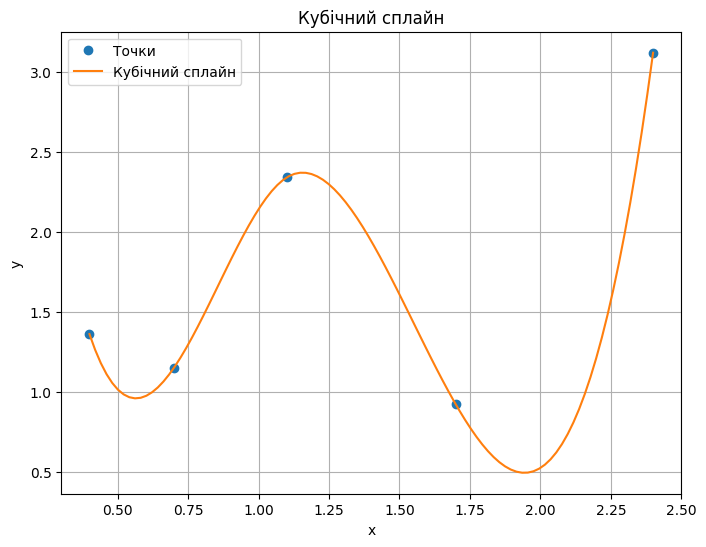

In [7]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
# Задані точки
x = np.array([0.4,0.7,1.1,1.7,2.4])
y = np.array([1.36,1.15,2.34,0.92,3.12])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)
for i in range(1, n):
 alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])
l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)
for i in range(1, n):
 l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
 mu[i] = h[i] / l[i]
 z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
# Виправлення обчислення коефіцієнтів для останнього відрізка
#c[n-1] = 0
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])
for j in range(n - 2, -1, -1):
 c[j] = z[j] - mu[j] * c[j+1]
 b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
 d[j] = (c[j+1] - c[j]) / (3 * h[j])
# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
 print(f"Відрізок {i+1}:")
 print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")
# Побудова кубічного сплайна
cs = CubicSpline(x, y)
# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)
# Роздрукуйте значення сплайна
print("Значення сплайна:")
for i in range(len(x_new)):
 print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")
# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()